In [58]:

import pandas as pd
import sys
from datetime import date, datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [62]:
sys.path.insert(0,"..")
bremen_trips = pd.read_csv("../data/processed/trips_weather.csv", index_col=0)
bremen_trips = bremen_trips.sort_values(by=['start_time'], ascending=True)
bremen_trips["start_time"] = pd.to_datetime(bremen_trips["start_time"])

In [63]:

for col in ['start_time']:
    bremen_trips['month'] = pd.DatetimeIndex(bremen_trips['start_time']).month
    bremen_trips['booking_date'] = bremen_trips.start_time.dt.date
    bremen_trips['weekdays'] = pd.DatetimeIndex(bremen_trips['start_time']).weekday

In [64]:
bremen_trips.head()


,bike_type,identification,start_time,end_time,duration_sec,start_lng,start_lat,end_lng,end_lat,start_place,...,dew_point_2m,max_at_2m,mean_speed_h/s,direction_degree_x,max_m/s,min_mean_m/s,max_mean_m/s,direction_degree_y,min,mm
0,71,12099440,2019-01-20 00:13:00,2019-01-20 00:23:00,600.0,8.812554,53.076481,8.804828,53.084196,0,...,-4.8,-3.4,2.6,80,3.1,2.1,2.6,80,0,0.0
1,71,10278649,2019-01-20 00:16:00,2019-01-20 04:47:00,16260.0,8.884911,53.078923,8.884911,53.078923,2985,...,-4.8,-3.4,2.6,80,3.1,2.1,2.6,80,0,0.0
2,71,12099749,2019-01-20 00:40:00,2019-01-20 00:44:00,240.0,8.801623,53.067878,8.793217,53.064244,0,...,-4.6,-3.6,2.6,80,3.1,2.4,2.6,80,0,0.0
3,71,12099872,2019-01-20 00:47:00,2019-01-20 00:54:00,420.0,8.814744,53.084841,8.801135,53.094596,0,...,-4.6,-3.6,2.6,80,3.1,2.4,2.6,80,0,0.0
4,71,7873840,2019-01-20 00:55:00,2019-01-20 23:10:00,80100.0,8.845743,53.106418,8.845743,53.106418,2912,...,-4.1,-3.2,2.4,80,2.6,2.1,2.6,80,0,0.0


In [65]:
bremen_trips['duration_min'] = bremen_trips['duration_sec']/60

In [66]:
# drop entries with booking durations longer than 2 days
# bremen_trips = bremen_trips[bremen_trips['duration_min'] < 200]
# bremen_trips = bremen_trips[(bremen_trips['start_place'] != 0) & (bremen_trips['end_place'] != 0)]
# bremen_trips = bremen_trips[bremen_trips['month'] != 1]

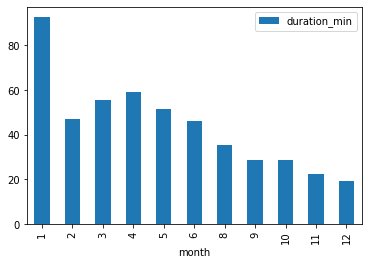

In [67]:
# avg duration per month (looks like we have some outliers)

df = bremen_trips.groupby('month').duration_min.mean().to_frame()
df.plot(kind="bar")

In [68]:
bremen_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143665 entries, 0 to 143664
Data columns (total 34 columns):
bike_type             143665 non-null int64
identification        143665 non-null int64
start_time            143665 non-null datetime64[ns]
end_time              143665 non-null object
duration_sec          143665 non-null float64
start_lng             143665 non-null float64
start_lat             143665 non-null float64
end_lng               143665 non-null float64
end_lat               143665 non-null float64
start_place           143665 non-null int64
end_place             143665 non-null int64
start_plz             143665 non-null int64
end_plz               143665 non-null int64
month                 143665 non-null int64
booking_date          143665 non-null object
weekdays              143665 non-null int64
duration_min          143665 non-null float64
start_name            36093 non-null object
end_name              31320 non-null object
sTime                 143665 n

In [71]:
data_raw = bremen_trips #[['bike','bike_type','identification', 'start_time', 'duration_min', 'start_lng', 'start_lat', 'start_place', 'month', 'weekdays']]

In [72]:
data_raw['hour'] = data_raw['start_time'].dt.hour
data_raw['min'] = data_raw['start_time'].dt.minute
data_raw['day_of_month'] = data_raw['start_time'].dt.day
data_raw.drop(axis = 1, columns = 'start_time', inplace=True)

In [73]:
# get uniformative features meaning that they contain over 95% of the time the same value
num_rows = len(data_raw.index)
low_information_cols = [] #

for col in data_raw.columns:
    cnts = data_raw[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

bike_type: 99.84478%
71    143442
29       223
Name: bike_type, dtype: int64

mm: 96.36655%
0.00    138445
0.03       821
0.04       736
0.06       260
0.09       259
         ...  
1.76         1
1.23         1
1.10         1
0.73         1
1.25         1
Name: mm, Length: 117, dtype: int64



In [38]:
# data_raw.drop(columns=["bike_type", "identification", "bike"], inplace=True)

In [39]:
#data_raw['is_freefloat'] = np.where(data_raw['start_place'] == 0, 1, 0)


In [74]:
data_raw

,bike_type,identification,end_time,duration_sec,start_lng,start_lat,end_lng,end_lat,start_place,end_place,...,mean_speed_h/s,direction_degree_x,max_m/s,min_mean_m/s,max_mean_m/s,direction_degree_y,min,mm,hour,day_of_month
0,71,12099440,2019-01-20 00:23:00,600.0,8.812554,53.076481,8.804828,53.084196,0,0,...,2.6,80,3.1,2.1,2.6,80,13,0.0,0,20
1,71,10278649,2019-01-20 04:47:00,16260.0,8.884911,53.078923,8.884911,53.078923,2985,2985,...,2.6,80,3.1,2.1,2.6,80,16,0.0,0,20
2,71,12099749,2019-01-20 00:44:00,240.0,8.801623,53.067878,8.793217,53.064244,0,0,...,2.6,80,3.1,2.4,2.6,80,40,0.0,0,20
3,71,12099872,2019-01-20 00:54:00,420.0,8.814744,53.084841,8.801135,53.094596,0,0,...,2.6,80,3.1,2.4,2.6,80,47,0.0,0,20
4,71,7873840,2019-01-20 23:10:00,80100.0,8.845743,53.106418,8.845743,53.106418,2912,2912,...,2.4,80,2.6,2.1,2.6,80,55,0.0,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143660,71,26519958,2019-12-31 23:49:00,480.0,8.871098,53.077498,8.872118,53.082471,0,0,...,0.8,180,1.5,0.0,0.8,180,41,0.0,23,31
143661,71,26520201,2019-12-31 23:59:00,900.0,8.821334,53.081942,8.806207,53.078418,0,0,...,0.8,180,1.5,0.0,0.8,180,44,0.0,23,31
143663,71,26520104,2019-12-31 23:55:00,420.0,8.779235,53.078581,8.790776,53.078867,2966,0,...,0.8,180,1.5,0.0,0.8,180,48,0.0,23,31
143662,71,26520101,2019-12-31 23:55:00,420.0,8.779235,53.078581,8.790580,53.078867,2966,0,...,0.8,180,1.5,0.0,0.8,180,48,0.0,23,31


In [75]:
data_raw.corrwith(data_raw['duration_min'])

bike_type            -0.016357
identification       -0.137817
duration_sec          1.000000
start_lng             0.006831
start_lat             0.039335
end_lng              -0.016370
end_lat               0.041569
start_place           0.057286
end_place             0.121112
start_plz             0.048672
end_plz               0.023052
month                -0.106484
weekdays              0.010704
duration_min          1.000000
temp_2m               0.008772
humidity_2m          -0.015242
dew_point_2m          0.002515
max_at_2m             0.008409
mean_speed_h/s        0.008834
direction_degree_x    0.004599
max_m/s               0.009791
min_mean_m/s          0.008574
max_mean_m/s          0.009274
direction_degree_y    0.004417
min                  -0.004414
mm                   -0.000249
hour                 -0.028410
day_of_month          0.006816
dtype: float64

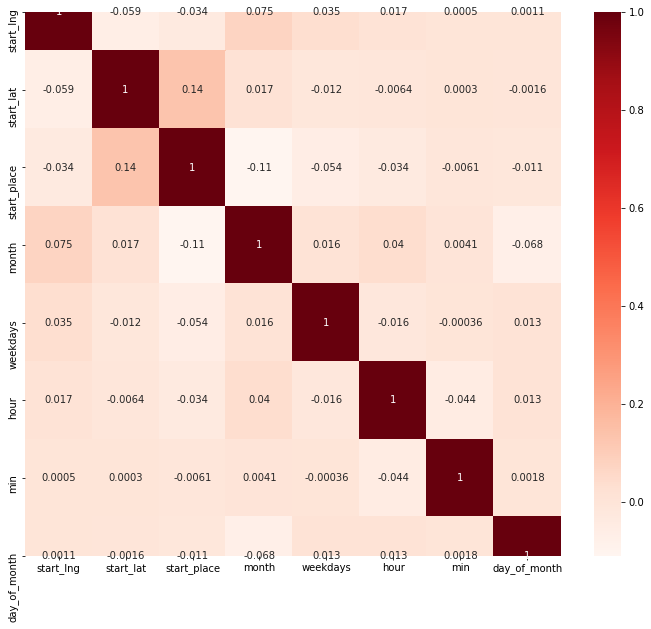

In [43]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data_raw.loc[:, data_raw.columns != 'duration_min'].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [44]:
data_raw.head()

,duration_min,start_lng,start_lat,start_place,month,weekdays,hour,min,day_of_month
0,10.0,8.812554,53.076481,0,1,6,0,13,20
1,271.0,8.884911,53.078923,2985,1,6,0,16,20
2,4.0,8.801623,53.067878,0,1,6,0,40,20
3,7.0,8.814744,53.084841,0,1,6,0,47,20
4,1335.0,8.845743,53.106418,2912,1,6,0,55,20


In [45]:
X = data_raw.loc[:, data_raw.columns != 'duration_min']
y = data_raw['duration_min']

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143665 entries, 0 to 143664
Data columns (total 8 columns):
start_lng       143665 non-null float64
start_lat       143665 non-null float64
start_place     143665 non-null int64
month           143665 non-null int64
weekdays        143665 non-null int64
hour            143665 non-null int64
min             143665 non-null int64
day_of_month    143665 non-null int64
dtypes: float64(2), int64(6)
memory usage: 9.9 MB


In [47]:
X.head()

,start_lng,start_lat,start_place,month,weekdays,hour,min,day_of_month
0,8.812554,53.076481,0,1,6,0,13,20
1,8.884911,53.078923,2985,1,6,0,16,20
2,8.801623,53.067878,0,1,6,0,40,20
3,8.814744,53.084841,0,1,6,0,47,20
4,8.845743,53.106418,2912,1,6,0,55,20


In [48]:
from sklearn.model_selection import train_test_split


X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.60, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.60, shuffle=False)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [54]:
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)

In [55]:
lin = LinearRegression()

In [56]:
lin.fit(X_train_poly, y_train)
lin.score(X_train_poly, y_train)

0.02802576543974811

In [57]:
lin.fit(X_train_poly, y_train)
lin.score(X_train_poly, y_train)

0.02802576543974811

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [22]:
parameters = {'max_depth':[2, 3, 4, 5, 7],
              'n_estimators':[1, 10, 25, 50, 100, 256, 512],
              'random_state':[42]}
    
def perform_grid_search(X_data, y_data):
    rf = RandomForestRegressor(criterion='mse')
    
    clf = GridSearchCV(rf, parameters, cv=4, scoring='r2', n_jobs=3)
    
    clf.fit(X_data, y_data)
    
    print(clf.cv_results_['mean_test_score'])
    
    return clf.best_params_['n_estimators'], clf.best_params_['max_depth']

In [23]:
# extract parameters
n_estimator, depth = perform_grid_search(X_train, y_train)
c_random_state = 42
print(n_estimator, depth, c_random_state)

KeyboardInterrupt: 

In [25]:
rf = RandomForestRegressor(criterion='mse', max_depth=5, n_estimators=512, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=512, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [26]:
y_pred = rf.predict(X_train)

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
mean_squared_error(y_train, y_pred)

145.00243716852808